<a href="https://colab.research.google.com/github/AhaanB29/ML_models/blob/main/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression
---



It is one of the classification models used to predict categorical data from a number of independent data.

A logistic regressor basically gives the probability value for the data and based on a limit(say 50%)  the output is given in terms of that category eg. Yes/No, 1/0 ... etc  

# Importing Libraries
---



In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
---



In [93]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X= dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Splitting dataset

---



In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [95]:
X_train;

# Feature Scaling

---



In [96]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training and Testing the Model


---



In [97]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)


LogisticRegression(random_state=0)

After training the model we predict the test data 

In [98]:
y_pred = logreg.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1);

In [99]:
print(logreg.predict(sc.transform([[37,87000]])))

[0]


# Making Confusion Matrix

---




In [100]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print (cm)
print(accuracy_score(y_test,y_pred))


[[52  6]
 [11 31]]
0.83


# Visualising Training set and Test set results


---



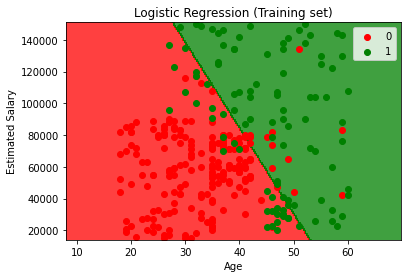

In [101]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, logreg.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The linear Line based on which the grid is divided gives the complete explaination on why this is a linear classifier model.
red region shows the people who did not buy the car, while green shows who did. 

We can see some wrong predictions as well, the green dots in the red region and the red dots in green region show the disparity between the true result and the predicted region


**Visualising Test set results**

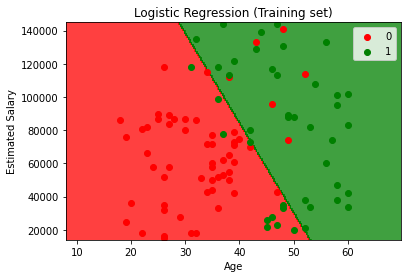

In [102]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, logreg.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()